In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl

In [9]:
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import probplot

In [6]:
df = pd.read_csv("sleep_cycle_productivity_cleaned.csv")

In [7]:
ordered_score = CategoricalDtype(categories=list(range(1, 11)), ordered=True)

df['Sleep Quality'] = df['Sleep Quality'].astype(ordered_score)
df['Productivity Score'] = df['Productivity Score'].astype(ordered_score)
df['Mood Score'] = df['Mood Score'].astype(ordered_score)
df['Stress Level'] = df['Stress Level'].astype(ordered_score)

df['Weekday'] = df['Weekday'].astype('category')
df['Gender'] = df['Gender'].astype('category')

In [8]:
df['Sleep Quality'] = df['Sleep Quality'].apply(lambda x: 0 if x <= 5 else 1)

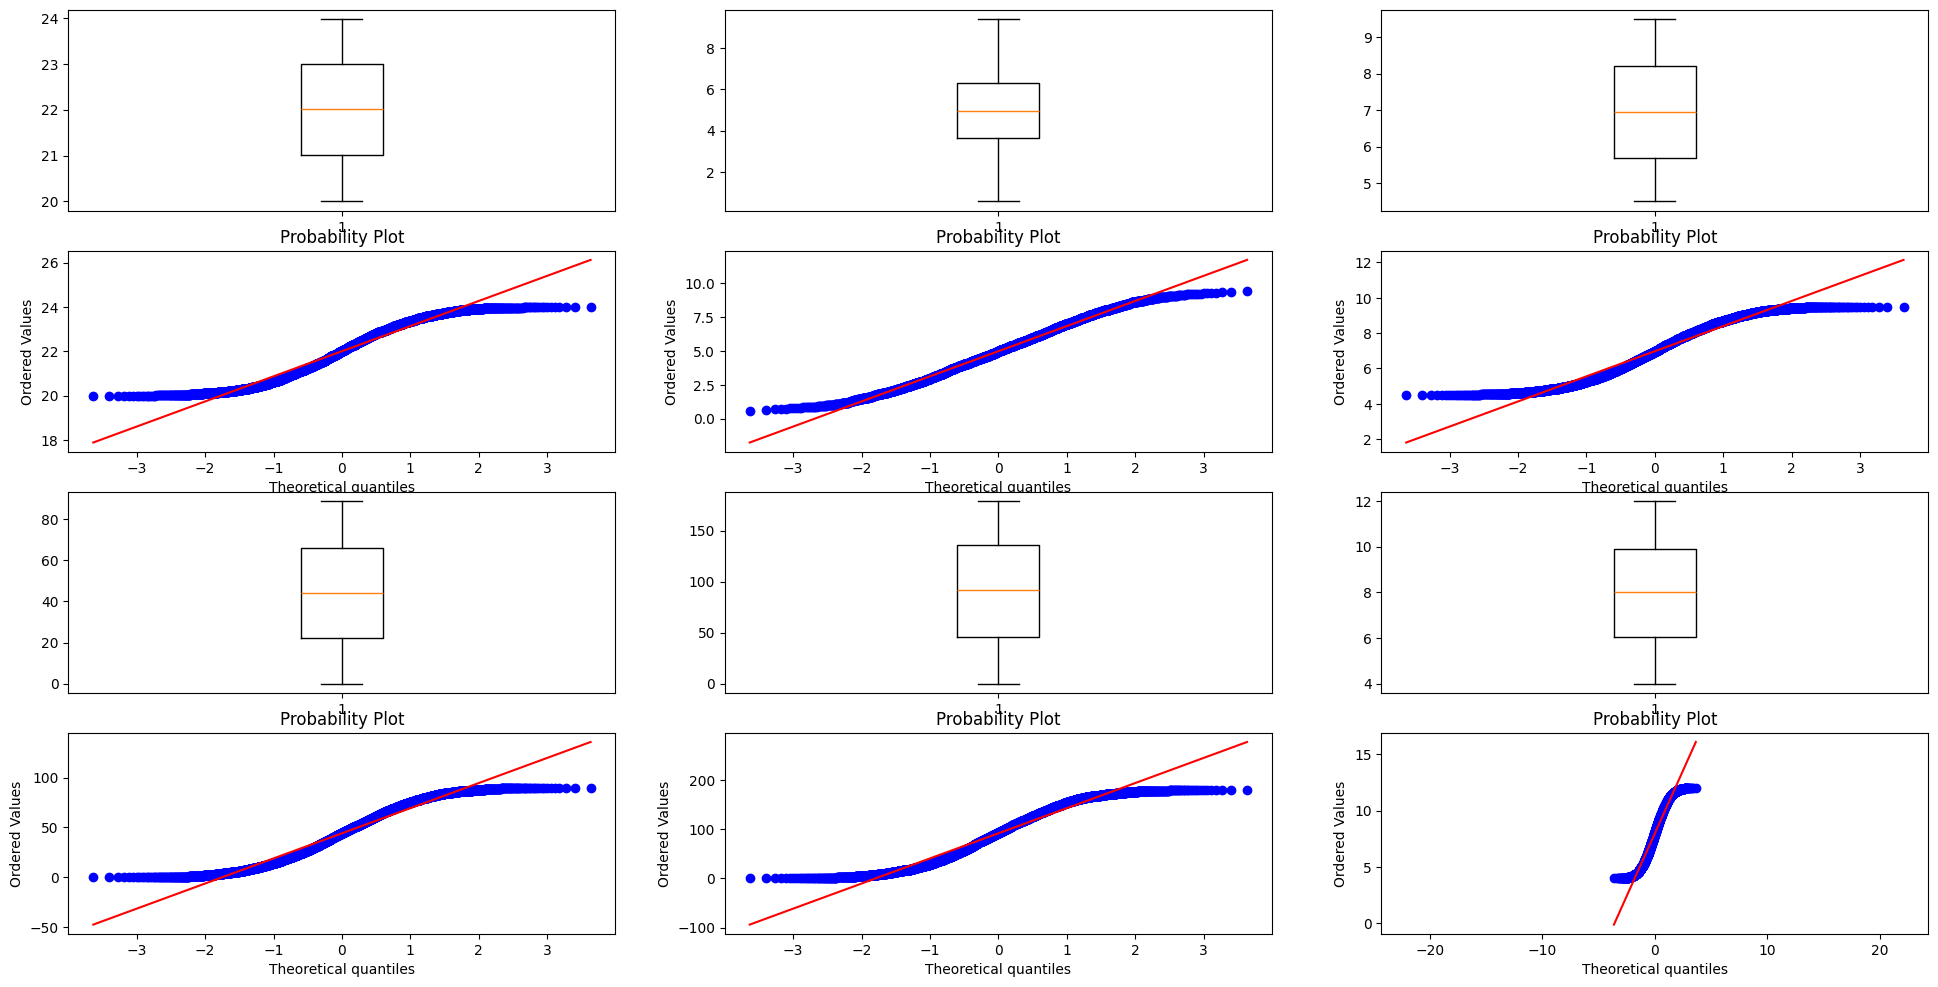

In [59]:
f, axes = plt.subplots(4, 3, figsize=(24, 12))

axes[0][0].boxplot(df['Sleep Start Time'])
probplot(df['Sleep Start Time'], plot=axes[1][0])
axes[0][1].boxplot(df['Sleep End Time'])
probplot(df['Sleep End Time'], plot=axes[1][1])
axes[0][2].boxplot(df['Total Sleep Hours'])
probplot(df['Total Sleep Hours'], plot=axes[1][2])

axes[2][0].boxplot(df['Exercise (mins/day)'])
probplot(df['Exercise (mins/day)'], plot=axes[3][0])
axes[2][1].boxplot(df['Screen Time Before Bed (mins)'])
probplot(df['Screen Time Before Bed (mins)'], plot=axes[3][1])
axes[2][2].boxplot(df['Work Hours (hrs/day)'])
probplot(df['Work Hours (hrs/day)'], plot=axes[3][2])


plt.axis("equal")

plt.show()

# Shapiro - Test

귀무가설 : 해당 데이터가 정규성을 충족한다.- 특징 : data수가 5000을 초과하는 경우, 정규성 검정에 대한 P 값을 담보하지 못한다. (즉, 통계적 유의성이 떨어진다.)


$H_0 : $ 데이터셋이 정규분포를 따른다.  
$H_1 : $ 데이터셋이 정규분포를 따르지 않는다.

In [72]:
data = df[['Sleep Start Time', 'Sleep End Time',
                    'Total Sleep Hours', 'Exercise (mins/day)',
                    'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)']]

In [76]:
for col in data.columns:
    # 현재 열의 데이터를 가져옵니다.
    data_to_test = df[col]

    # 샤피로-윌크 정규성 검정을 수행합니다.
    statistic, pvalue = stats.shapiro(data_to_test)

    # 결과를 출력합니다.
    print(f"변수: {col}")
    print(f"  검정 통계량 (Statistic): {statistic:.4f}")
    print(f"  p-value: {pvalue:.4f}")
    print("-" * 45)

print("\n p값이 유의수준 0.05보다 작아 연속형 변수는 정규 분포를 따른다고 보기 어렵습니다.")


변수: Sleep Start Time
  검정 통계량 (Statistic): 0.9539
  p-value: 0.0000
---------------------------------------------
변수: Sleep End Time
  검정 통계량 (Statistic): 0.9916
  p-value: 0.0000
---------------------------------------------
변수: Total Sleep Hours
  검정 통계량 (Statistic): 0.9536
  p-value: 0.0000
---------------------------------------------
변수: Exercise (mins/day)
  검정 통계량 (Statistic): 0.9557
  p-value: 0.0000
---------------------------------------------
변수: Screen Time Before Bed (mins)
  검정 통계량 (Statistic): 0.9540
  p-value: 0.0000
---------------------------------------------
변수: Work Hours (hrs/day)
  검정 통계량 (Statistic): 0.9585
  p-value: 0.0000
---------------------------------------------

 p값이 유의수준 0.05보다 작아 연속형 변수는 정규 분포를 따른다고 보기 어렵습니다.
